In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Models import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# DATA

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

max_len = 200
vocabulary_size = max_features = 10000
embed_size = 32 
(X, y), (X_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=max_features)
X = tf.keras.utils.pad_sequences(X, maxlen=max_len)
X_test = tf.keras.utils.pad_sequences(X_test, maxlen=max_len)

X_train, X_val, y_train, y_val = train_test_split(X, y)

2110848/2110848 [==============================] - 1s 0us/step


In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Sentence length distribution

# Experiments

In [7]:
def experiment(train,val,max_len = 80, vocabulary_size = 10000, embed_size = 32,epochs=10):
    X_train,y_train = train
    X_val,y_val = val
    models = {}
    for model_fun,name in zip([get_small, get_medium],['small', 'medium']):
        for optimizer in ['adam', 'rmsprop']:
            for binary in [False, True]:
                model = model_fun(optimizer=optimizer,binary=binary,max_len=max_len,vocabulary_size=vocabulary_size,embed_size=embed_size)
                model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=epochs,verbose=1)
                b = "binary" if binary else "standard"
                models[name+"_"+b+"_"+optimizer] = model

    for binary in [False, True]:
        model = get_large(optimizer='adam',binary=binary,max_len=max_len,vocabulary_size=vocabulary_size,embed_size=embed_size)
        model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=epochs,verbose=1)
        b = "binary" if binary else "standard"
        models['large'+"_"+b+"_adam"] = model
                
    for optimizer in ['adam', 'rmsprop']:
        for lr in [0.01,0.001,0.0001]:
            model = get_small(optimizer=optimizer,lr=lr,binary=True,max_len=max_len,vocabulary_size=vocabulary_size,embed_size=embed_size)
            model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=epochs,verbose=1)
            models["small_binary_lr="+str(lr)+"_"+optimizer] = model

    for optimizer in ['adam', 'rmsprop']:
        for bs in [32,128,256]:
            model = get_small(optimizer=optimizer,binary=True,max_len=max_len,vocabulary_size=vocabulary_size,embed_size=embed_size)
            model.fit(X_train,y_train,batch_size=bs,validation_data=(X_val,y_val),epochs=epochs,verbose=1)
            models["small_binary_bs="+str(bs)+"_"+optimizer] = model
    return models

In [34]:
def plot_diffrent_sizes(models):
    for model in ['small', 'medium', 'large']:
        for binary in ["binary","standard"]:
            for optimizer in ['adam', 'rmsprop']:
                if model=='large' and optimizer=='rmsprop':
                    continue
                plt.plot(models[model+"_"+binary+"_"+optimizer].history.history["val_accuracy"], label=model+"_"+binary+"_"+optimizer)
        plt.title("Validation accuracy")
        plt.legend()
        plt.show()

def plot_diffrent_lr(models):
    for lr in [0.01,0.001,0.0001]:
        for optimizer in ['adam', 'rmsprop']:
            plt.plot(models["small_binary_lr="+str(lr)+"_"+optimizer].history.history["val_accuracy"], label="small_binary_lr="+str(lr)+"_"+optimizer)
    plt.title("Validation accuracy")
    plt.legend()
    plt.show()

def plot_diffrent_bs(models):
    for bs in [32,128,256]:
        for optimizer in ['adam', 'rmsprop']:
            plt.plot(models["small_binary_bs="+str(bs)+"_"+optimizer].history.history["val_accuracy"], label="small_binary_bs="+str(bs)+"_"+optimizer)
    plt.title("Validation accuracy")
    plt.legend()
    plt.show()

def plot_cm(models):
    for key in models.keys():
        pred = np.argmax(models[key].predict(X_test, verbose = 0), axis = 1)
        y_test_tmp=np.argmax(y_test, axis = 1)
        plt.title(key+f"\nAccuracy: {accuracy_score(y_test_tmp,pred)}")
        plt.imshow(confusion_matrix(y_test_tmp, pred))
        plt.show()

In [12]:
models = experiment((X_train,y_train),(X_val,y_val),epochs=10, max_len = 200, vocabulary_size = 10000)

Epoch 1/10
211/211 [==============================] - 31s 139ms/step - loss: 2.5059 - accuracy: 0.3483 - val_loss: 2.1964 - val_accuracy: 0.3682
Epoch 2/10
211/211 [==============================] - 29s 135ms/step - loss: 2.0828 - accuracy: 0.4749 - val_loss: 1.7731 - val_accuracy: 0.5574
Epoch 3/10
211/211 [==============================] - 27s 128ms/step - loss: 1.6646 - accuracy: 0.5760 - val_loss: 1.4768 - val_accuracy: 0.6233
Epoch 4/10
211/211 [==============================] - 28s 132ms/step - loss: 1.4405 - accuracy: 0.6425 - val_loss: 1.3976 - val_accuracy: 0.6670
Epoch 5/10
211/211 [==============================] - 27s 129ms/step - loss: 1.2821 - accuracy: 0.6827 - val_loss: 1.2843 - val_accuracy: 0.6879
Epoch 6/10
211/211 [==============================] - 28s 133ms/step - loss: 1.1424 - accuracy: 0.7117 - val_loss: 1.2143 - val_accuracy: 0.7128
Epoch 7/10
211/211 [==============================] - 27s 129ms/step - loss: 1.0040 - accuracy: 0.7500 - val_loss: 1.2146 - val_ac

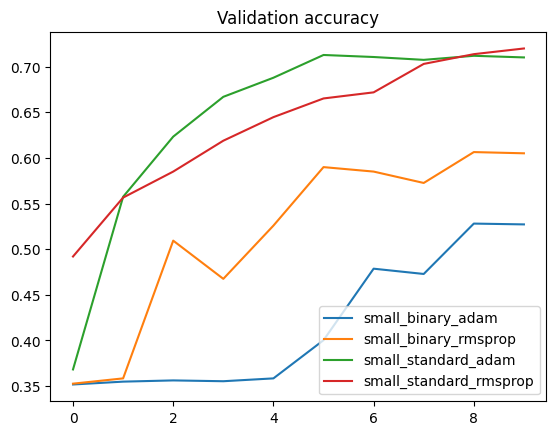

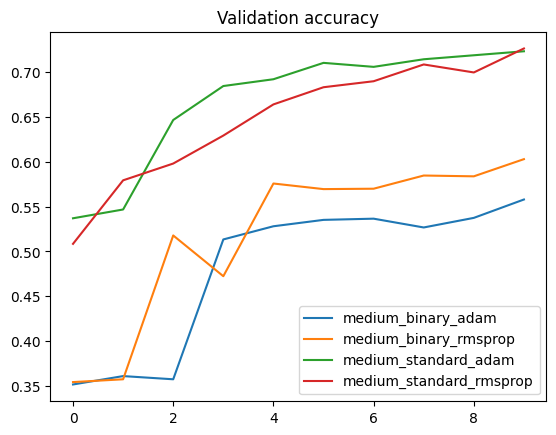

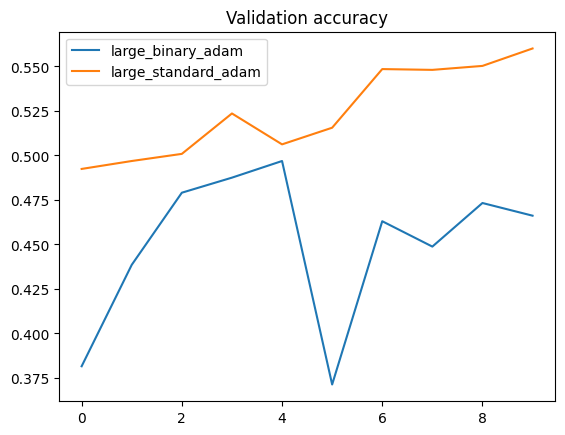

In [13]:
plot_diffrent_sizes(models)

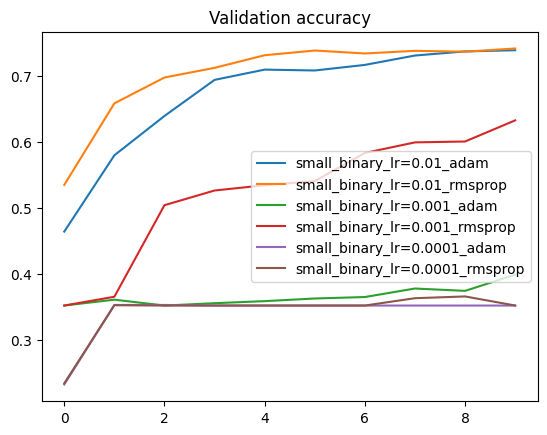

In [14]:
plot_diffrent_lr(models)

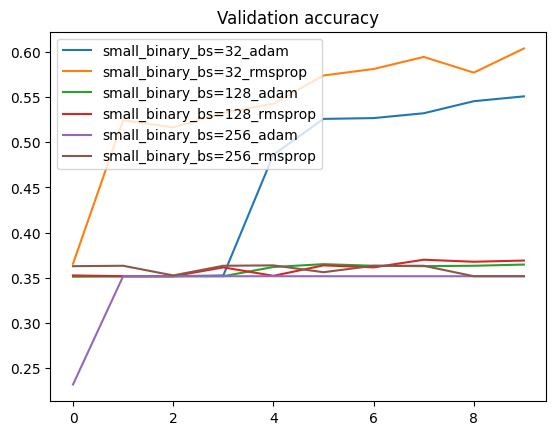

In [15]:
plot_diffrent_bs(models)

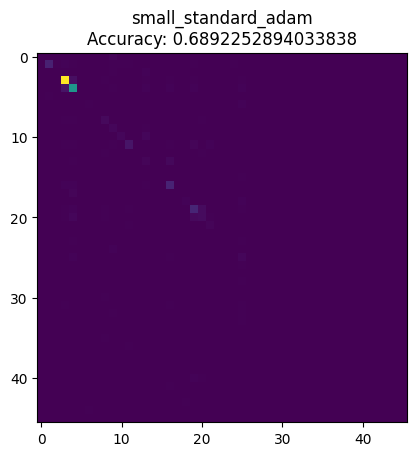

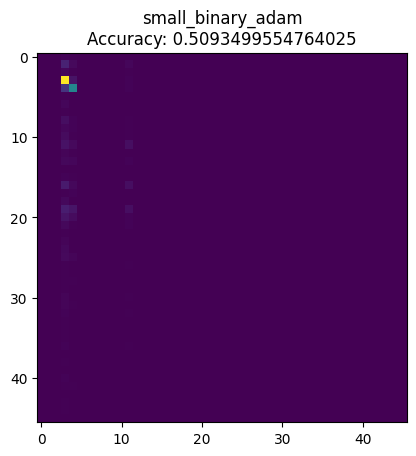

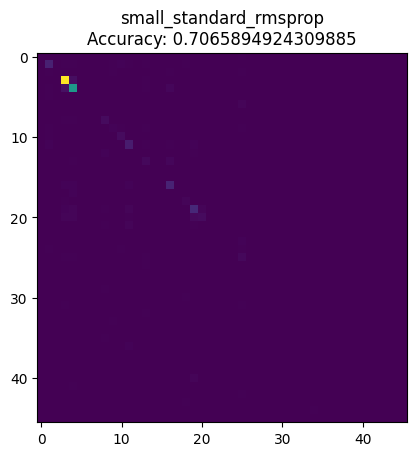

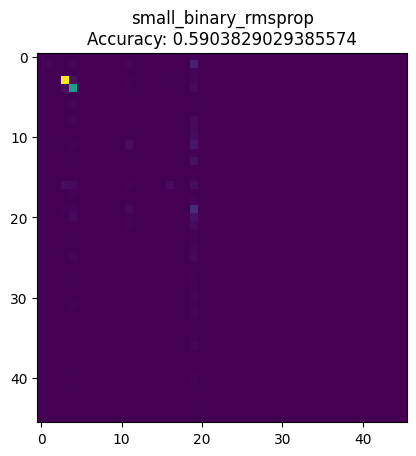

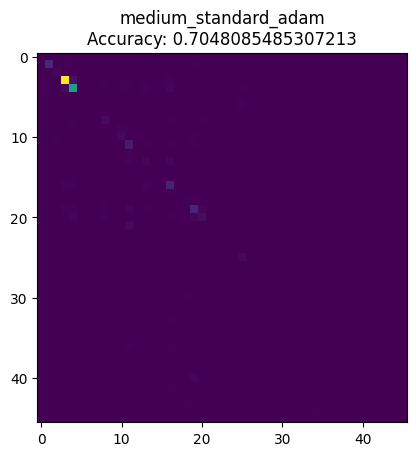

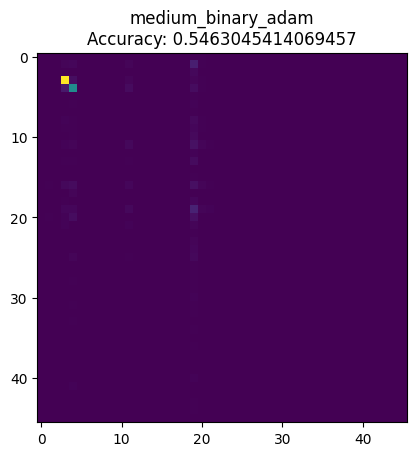

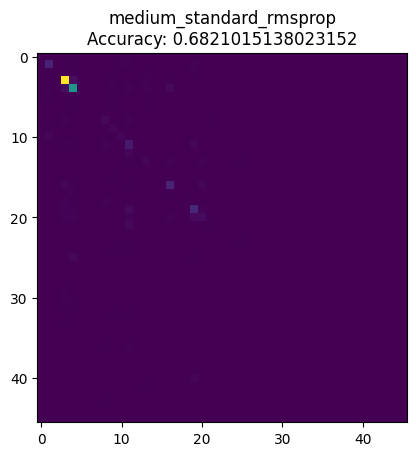

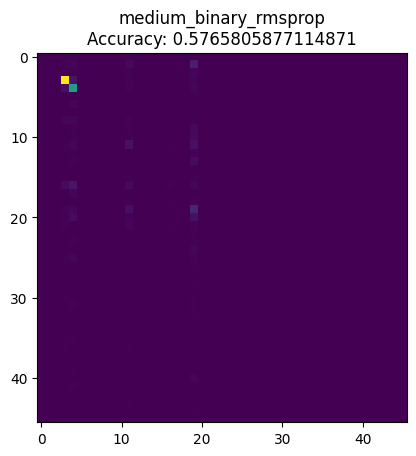

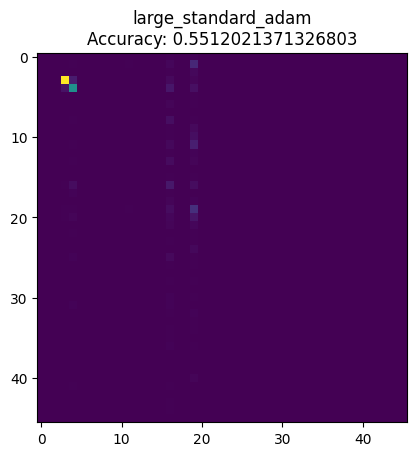

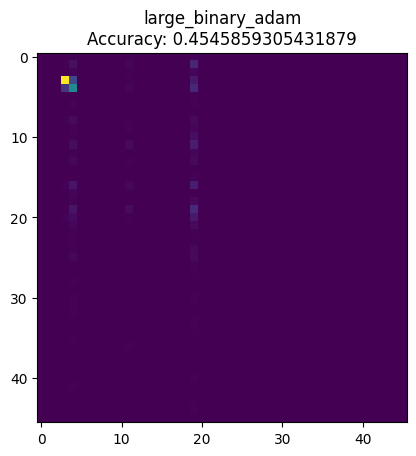

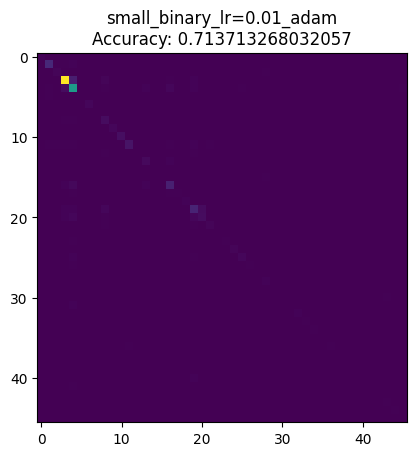

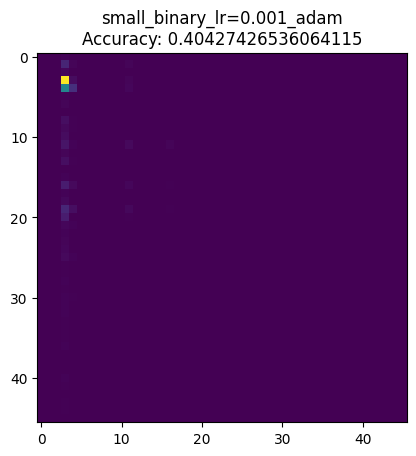

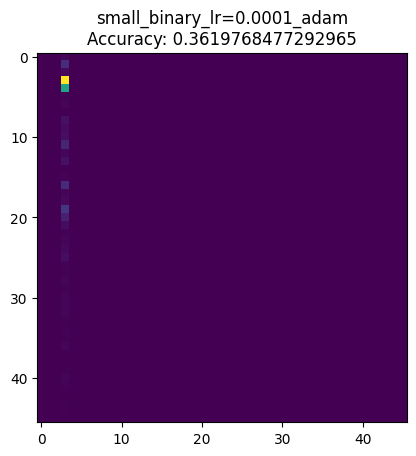

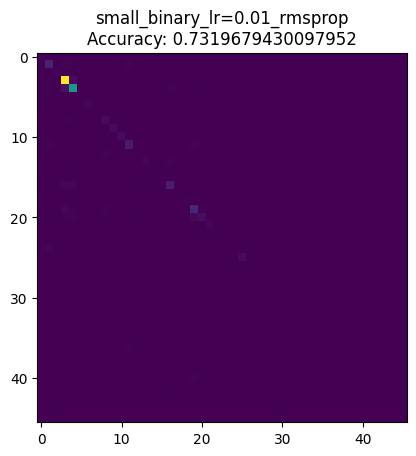

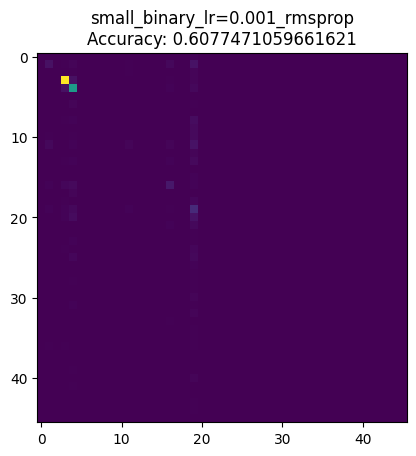

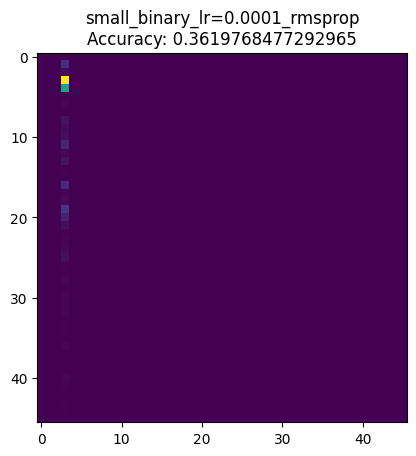

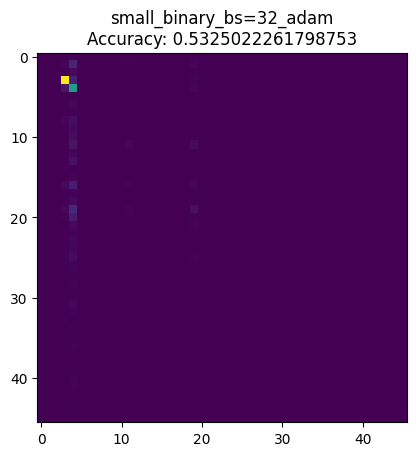

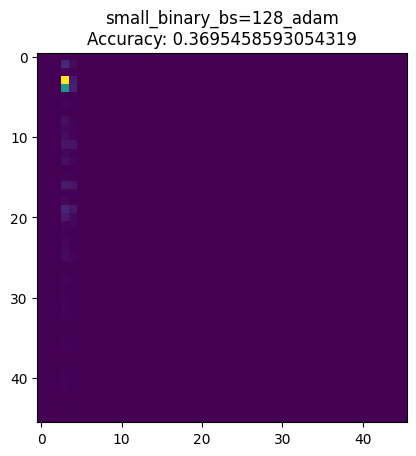

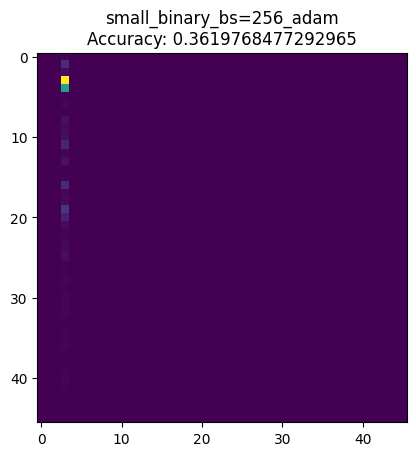

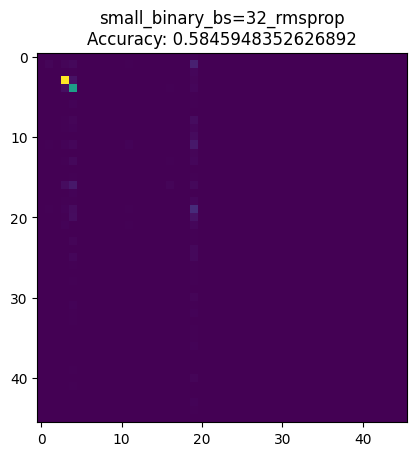

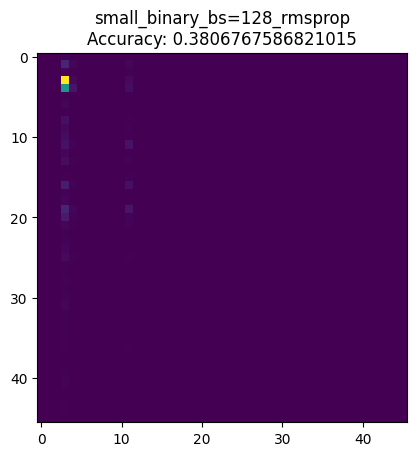

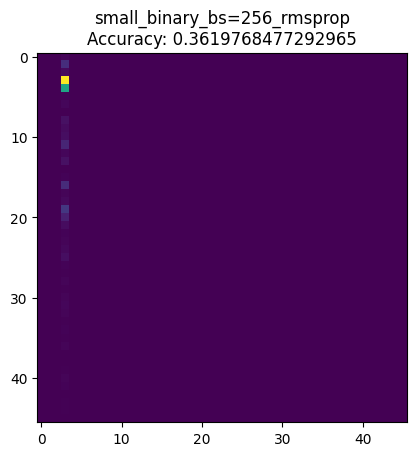

In [35]:
plot_cm(models)